In [446]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.metrics import classification_report, f1_score, cohen_kappa_score,mean_squared_error
from sklearn.metrics import mean_squared_error,r2_score

In [338]:

customer_df=pd.read_csv('files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv')

In [339]:
customer_df.shape

(9134, 24)

In [340]:
customer_df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [341]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [342]:
#Rename the columns so they follow the PE8 (snake case) (lower_case_with_underscores)

customer_df.columns = list(map(lambda x: x.lower(), customer_df.columns))
customer_df.columns = customer_df.columns.str.replace(" ","_")
display(customer_df)


,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [343]:
# Change effective to date column to datetime format.
import time
from datetime import date
customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date'])

In [344]:
customer_df.nunique()

customer                         9134
state                               5
customer_lifetime_value          8041
response                            2
coverage                            3
education                           5
effective_to_date                  59
employmentstatus                    5
gender                              2
income                           5694
location_code                       3
marital_status                      3
monthly_premium_auto              202
months_since_last_claim            36
months_since_policy_inception     100
number_of_open_complaints           6
number_of_policies                  9
policy_type                         3
policy                              9
renew_offer_type                    4
sales_channel                       4
total_claim_amount               5106
vehicle_class                       6
vehicle_size                        3
dtype: int64

In [345]:
# function fro spilting dataframes
def split_dataframe(df,num):
    cols=list(df)
    customer_df_num=df.copy()
    customer_df_cat=df.copy()
    for i in range(len(cols)):
        if df[cols[i]].nunique()<=num:
            customer_df_num=customer_df_num.drop(columns=cols[i], axis=1)
        else:
            customer_df_cat=customer_df_cat.drop(columns=cols[i], axis=1)
    return  customer_df_num ,customer_df_cat    
               
customer_num_df, customer_cat_df = split_dataframe(customer_df,10)


In [346]:
customer_num_df.info()
customer_cat_df.info()
# we see the customer_id is not numerical nor categorical so we just delete it from our cat data 
# effective day is also not numercial is date so i rempve it from numerical data as well 
customer_num_df=customer_num_df.drop('customer',axis=1)
#customer_num_df=customer_num_df.drop('effective_to_date',axis=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer                       9134 non-null   object        
 1   customer_lifetime_value        9134 non-null   float64       
 2   effective_to_date              9134 non-null   datetime64[ns]
 3   income                         9134 non-null   int64         
 4   monthly_premium_auto           9134 non-null   int64         
 5   months_since_last_claim        9134 non-null   int64         
 6   months_since_policy_inception  9134 non-null   int64         
 7   total_claim_amount             9134 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(4), object(1)
memory usage: 571.0+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 16 columns):
 #   Column                     No

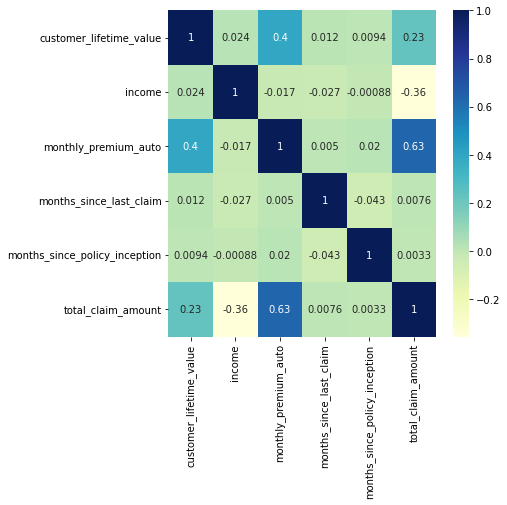

In [347]:
#Plot a correlation matrix, comment what you see.
corr_matrix=customer_num_df.corr()
fig, ax = plt.subplots(figsize=(6, 6))
ax = sns.heatmap(corr_matrix ,annot=True,cmap="YlGnBu")
# we have correlation between monthly_premiuom_auto with income which is obvious 

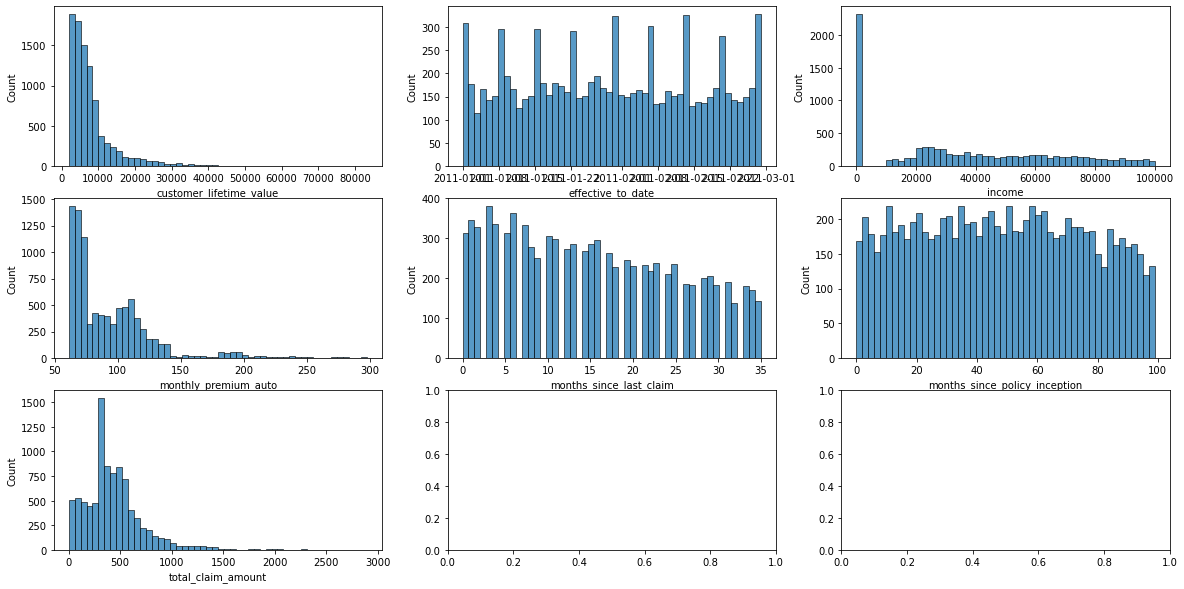

In [348]:
#Create a function to plot every discrete variable. 
#Do the same with the continuous variables (Be Careful, you may need to change the plot type to one better
#suited for continuous data!)
def plot_num(df):
    col=list(df.columns)
    fig,ax=plt.subplots(int(np.ceil(len(col)/3)),3 ,figsize=(20,10))
    j=0
    k=0
    for i in range(len(col)):
        sns.histplot(x =df[col[i]], data = df, ax=ax[j,k],bins = 50)
        k=k+1
        if k>=3:
            j=j+1
            k=0
            
plot_num(customer_num_df)

#customer life time value are left skewed
#income we have more than 2000 customer with income of 0 so which cause that we can't see the other values in this digram properly
#monthly premium auto is left skewed 
# month_since_last_date_claim  and months_since_policy_inception are seems to be normal
# number of total claim_amount also is little left skewed 
#we would better to see outliers with box_plot

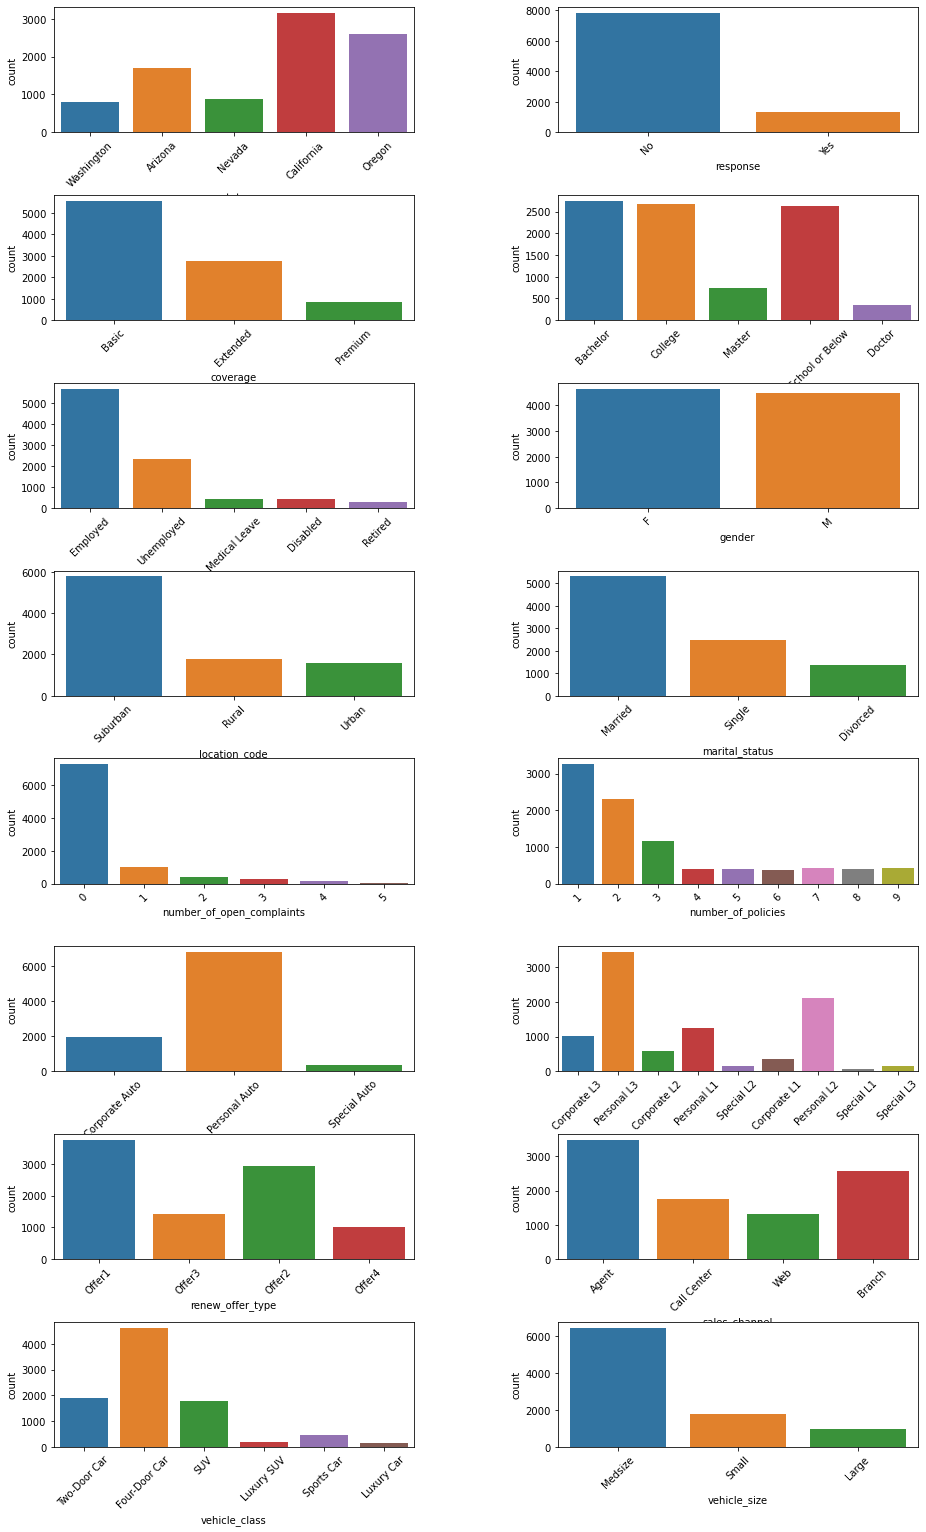

In [349]:
def plot_cat(df):
    col=list(df.columns)
    fig,ax=plt.subplots(int(np.ceil(len(col)/2)),2 ,figsize=(15,25))
    plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.5)
    j=0
    k=0
    for i in range(len(col)):
        chart=sns.countplot(x=df[col[i]],data=df,ax=ax[j,k])
        chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
        k=k+1
        if k>=2:
            j=j+1
            k=0
plot_cat(customer_cat_df)

# in categorical data most of the frequency of the most of them are not same as each other

In [350]:
customer_num_df.columns

Index(['customer_lifetime_value', 'effective_to_date', 'income',
       'monthly_premium_auto', 'months_since_last_claim',
       'months_since_policy_inception', 'total_claim_amount'],
      dtype='object')

In [351]:
customer_cat_df.columns

Index(['state', 'response', 'coverage', 'education', 'employmentstatus',
       'gender', 'location_code', 'marital_status',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'vehicle_class',
       'vehicle_size'],
      dtype='object')

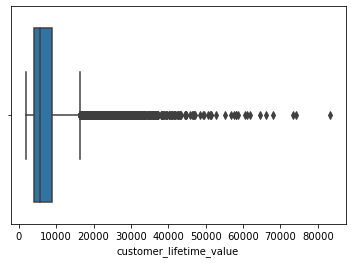

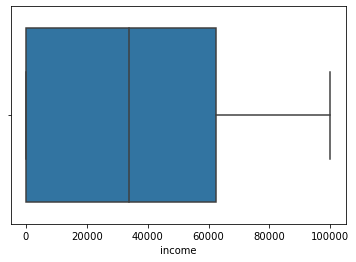

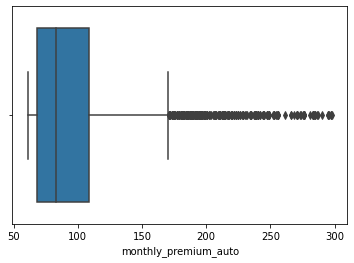

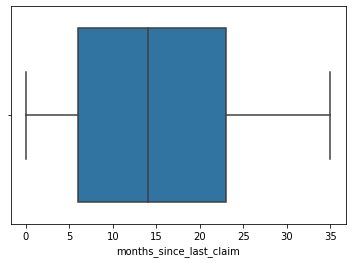

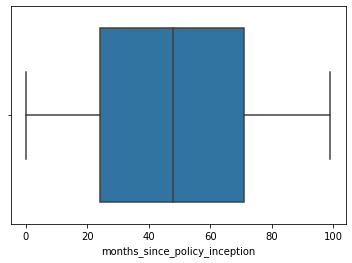

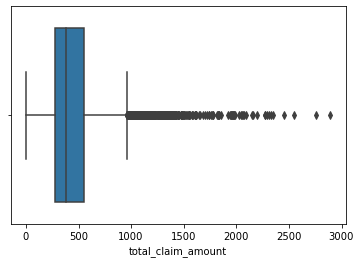

In [352]:
# creat function to show box plot of numerical values
sns.boxplot(x=customer_num_df['customer_lifetime_value'], data=customer_num_df)
plt.show()
sns.boxplot(x=customer_num_df['income'], data=customer_num_df)
plt.show()
sns.boxplot(x=customer_num_df['monthly_premium_auto'], data=customer_num_df)
plt.show()
sns.boxplot(x=customer_num_df['months_since_last_claim'], data=customer_num_df)
plt.show()
sns.boxplot(x=customer_num_df['months_since_policy_inception'], data=customer_num_df)
plt.show()
sns.boxplot(x=customer_num_df['total_claim_amount'], data=customer_num_df)
plt.show()

#customer lifetime value: it has lots of outliers. I think we can creat another data set with outliers
#income: it dosent have outliers but it is left skwed and first quartile is 0
#monthly_premium_auto: it has outliers.
#months_since_last_claim: no outliers , it seems normal distribution.
#months_since_policy_inception: no outliers , it seems normal distribution.
#number_of_policies: the majority of people has max. 3 policies. We could group into: 1,2,3,more than 3.
#total_claim_amount: left skwed, has outliers 


In [353]:
#Check all columns for NaN values. Decide what (if anything) you will need to do with them.

customer_df.isna().sum()
d=customer_df[customer_df != '']==True
display(d.nunique())


#we dont have any null values

customer                         1
state                            1
customer_lifetime_value          1
response                         1
coverage                         1
education                        1
effective_to_date                1
employmentstatus                 1
gender                           1
income                           1
location_code                    1
marital_status                   1
monthly_premium_auto             1
months_since_last_claim          2
months_since_policy_inception    2
number_of_open_complaints        2
number_of_policies               2
policy_type                      1
policy                           1
renew_offer_type                 1
sales_channel                    1
total_claim_amount               1
vehicle_class                    1
vehicle_size                     1
dtype: int64

In [354]:
customer_df[customer_df == ' ']==True

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9130,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9131,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9132,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


#  Cleaning categorical data


In [355]:
customer_cat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   state                      9134 non-null   object
 1   response                   9134 non-null   object
 2   coverage                   9134 non-null   object
 3   education                  9134 non-null   object
 4   employmentstatus           9134 non-null   object
 5   gender                     9134 non-null   object
 6   location_code              9134 non-null   object
 7   marital_status             9134 non-null   object
 8   number_of_open_complaints  9134 non-null   int64 
 9   number_of_policies         9134 non-null   int64 
 10  policy_type                9134 non-null   object
 11  policy                     9134 non-null   object
 12  renew_offer_type           9134 non-null   object
 13  sales_channel              9134 non-null   object
 14  vehicle_

In [356]:
#Check for NaN values.
customer_cat_df.isna().sum()

state                        0
response                     0
coverage                     0
education                    0
employmentstatus             0
gender                       0
location_code                0
marital_status               0
number_of_open_complaints    0
number_of_policies           0
policy_type                  0
policy                       0
renew_offer_type             0
sales_channel                0
vehicle_class                0
vehicle_size                 0
dtype: int64

In [357]:
customer_cat_df.columns

Index(['state', 'response', 'coverage', 'education', 'employmentstatus',
       'gender', 'location_code', 'marital_status',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'vehicle_class',
       'vehicle_size'],
      dtype='object')

In [358]:
#Check all unique values of columns.
customer_cat_df.nunique()

state                        5
response                     2
coverage                     3
education                    5
employmentstatus             5
gender                       2
location_code                3
marital_status               3
number_of_open_complaints    6
number_of_policies           9
policy_type                  3
policy                       9
renew_offer_type             4
sales_channel                4
vehicle_class                6
vehicle_size                 3
dtype: int64

In [359]:
#Check dtypes. Do they all make sense as categorical data?

customer_cat_df.info()
# number_of_open_complaints and number_of_policies can be numercial discrete

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   state                      9134 non-null   object
 1   response                   9134 non-null   object
 2   coverage                   9134 non-null   object
 3   education                  9134 non-null   object
 4   employmentstatus           9134 non-null   object
 5   gender                     9134 non-null   object
 6   location_code              9134 non-null   object
 7   marital_status             9134 non-null   object
 8   number_of_open_complaints  9134 non-null   int64 
 9   number_of_policies         9134 non-null   int64 
 10  policy_type                9134 non-null   object
 11  policy                     9134 non-null   object
 12  renew_offer_type           9134 non-null   object
 13  sales_channel              9134 non-null   object
 14  vehicle_

In [360]:
#Does any column contain alpha and numeric data? Decide how to clean it.
for column in customer_cat_df:
        cat_column = customer_cat_df[column]
        print(cat_column.value_counts())

California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: state, dtype: int64
No     7826
Yes    1308
Name: response, dtype: int64
Basic       5568
Extended    2742
Premium      824
Name: coverage, dtype: int64
Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: education, dtype: int64
Employed         5698
Unemployed       2317
Medical Leave     432
Disabled          405
Retired           282
Name: employmentstatus, dtype: int64
F    4658
M    4476
Name: gender, dtype: int64
Suburban    5779
Rural       1773
Urban       1582
Name: location_code, dtype: int64
Married     5298
Single      2467
Divorced    1369
Name: marital_status, dtype: int64
0    7252
1    1011
2     374
3     292
4     149
5      56
Name: number_of_open_complaints, dtype: int64
1    3251
2    2294
3    1168
7     433
9     416
4     409
5     407
8     384
6     372
Name: numb

In [361]:
#Compare policy_type and policy. What information is contained in these columns. Can you identify what is important?
display(customer_cat_df['policy_type'].value_counts())
display(customer_cat_df['policy'].value_counts())
# personal Auto: is sum of Personal L3,L2, L1
#Corporate Auto: is sum Corporate L3,l2,l1
# special Auto : is sum special L3,l2,l1


Personal Auto     6788
Corporate Auto    1968
Special Auto       378
Name: policy_type, dtype: int64

Personal L3     3426
Personal L2     2122
Personal L1     1240
Corporate L3    1014
Corporate L2     595
Corporate L1     359
Special L2       164
Special L3       148
Special L1        66
Name: policy, dtype: int64

In [362]:
# so we can remove policy form categorical data
customer_num_df['number_of_open_complaints']=customer_cat_df['number_of_open_complaints']
customer_num_df['number_of_policies']=customer_cat_df['number_of_policies']
# and Drop them from Categorical
customer_cat_df=customer_cat_df.drop('number_of_policies',axis=1)
customer_cat_df=customer_cat_df.drop('number_of_open_complaints',axis=1)
customer_num_df.info()
customer_cat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer_lifetime_value        9134 non-null   float64       
 1   effective_to_date              9134 non-null   datetime64[ns]
 2   income                         9134 non-null   int64         
 3   monthly_premium_auto           9134 non-null   int64         
 4   months_since_last_claim        9134 non-null   int64         
 5   months_since_policy_inception  9134 non-null   int64         
 6   total_claim_amount             9134 non-null   float64       
 7   number_of_open_complaints      9134 non-null   int64         
 8   number_of_policies             9134 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(6)
memory usage: 642.4 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns

In [363]:
# Check number of unique values in each column, can they be combined in any way to ease encoding? Comment your thoughts and make those changes.

for column in customer_cat_df:
        cat_column = customer_cat_df[column]
        print(cat_column.value_counts())
        print("***************************")

# I just drop number_of_open_complaints and number_of_policies from categorical to Numercial becuse the are ordinals

California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: state, dtype: int64
***************************
No     7826
Yes    1308
Name: response, dtype: int64
***************************
Basic       5568
Extended    2742
Premium      824
Name: coverage, dtype: int64
***************************
Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: education, dtype: int64
***************************
Employed         5698
Unemployed       2317
Medical Leave     432
Disabled          405
Retired           282
Name: employmentstatus, dtype: int64
***************************
F    4658
M    4476
Name: gender, dtype: int64
***************************
Suburban    5779
Rural       1773
Urban       1582
Name: location_code, dtype: int64
***************************
Married     5298
Single      2467
Divorced    1369
Name: marital_status, dtype: int64
**********

In [364]:
# Change Covrege to orinals so we could consider it as numerical
def coverage(x):
    if x =="Basic":
        return 0
    elif x =="Extended":
        return 1
    else:
        return 2
customer_cat_df['coverage']=customer_cat_df['coverage'].apply(coverage)
customer_cat_df['coverage'].value_counts()

# so we put coverage in Numerical Data Frame
customer_num_df['coverage']=customer_cat_df['coverage']
customer_cat_df=customer_cat_df.drop('coverage',axis=1)
customer_num_df.info()
customer_cat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer_lifetime_value        9134 non-null   float64       
 1   effective_to_date              9134 non-null   datetime64[ns]
 2   income                         9134 non-null   int64         
 3   monthly_premium_auto           9134 non-null   int64         
 4   months_since_last_claim        9134 non-null   int64         
 5   months_since_policy_inception  9134 non-null   int64         
 6   total_claim_amount             9134 non-null   float64       
 7   number_of_open_complaints      9134 non-null   int64         
 8   number_of_policies             9134 non-null   int64         
 9   coverage                       9134 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(7)
memory usage: 713.7 KB
<class 'pandas.cor

In [365]:
customer_df['effective_to_date']

0      2011-02-24
1      2011-01-31
2      2011-02-19
3      2011-01-20
4      2011-02-03
          ...    
9129   2011-02-10
9130   2011-02-12
9131   2011-02-06
9132   2011-02-03
9133   2011-02-14
Name: effective_to_date, Length: 9134, dtype: datetime64[ns]

# Comparing regression models

In [366]:
# create anothe column for date just put the month becuase all data is from 2011
customer_df['effective_month'] = customer_df['effective_to_date'].dt.month
customer_num_df=customer_num_df.drop('effective_to_date',axis=1)
customer_num_df['effective_month']=customer_df['effective_month']

In [367]:
customer_num_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer_lifetime_value        9134 non-null   float64
 1   income                         9134 non-null   int64  
 2   monthly_premium_auto           9134 non-null   int64  
 3   months_since_last_claim        9134 non-null   int64  
 4   months_since_policy_inception  9134 non-null   int64  
 5   total_claim_amount             9134 non-null   float64
 6   number_of_open_complaints      9134 non-null   int64  
 7   number_of_policies             9134 non-null   int64  
 8   coverage                       9134 non-null   int64  
 9   effective_month                9134 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 713.7 KB


In [368]:
customer_cat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   state             9134 non-null   object
 1   response          9134 non-null   object
 2   education         9134 non-null   object
 3   employmentstatus  9134 non-null   object
 4   gender            9134 non-null   object
 5   location_code     9134 non-null   object
 6   marital_status    9134 non-null   object
 7   policy_type       9134 non-null   object
 8   policy            9134 non-null   object
 9   renew_offer_type  9134 non-null   object
 10  sales_channel     9134 non-null   object
 11  vehicle_class     9134 non-null   object
 12  vehicle_size      9134 non-null   object
dtypes: object(13)
memory usage: 927.8+ KB


In [369]:
customer_final=pd.concat([customer_num_df,customer_cat_df],axis=1)
customer_final.shape

(9134, 23)

# Dealing with outliers

<AxesSubplot:xlabel='customer_lifetime_value'>

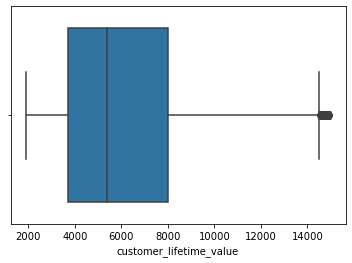

In [370]:
#Dealing with outliers
#customer_lifetime_value
#sns.boxplot(customer_final='customer_lifetime_value',data=customer_final)

customer_final=customer_final[customer_final['customer_lifetime_value']<15000]
sns.boxplot(x='customer_lifetime_value',data=customer_final)

<AxesSubplot:xlabel='monthly_premium_auto'>

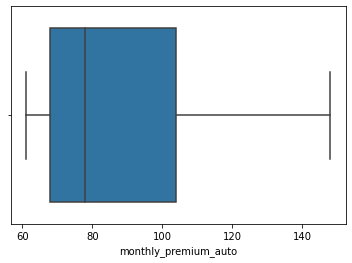

In [371]:
#monthly_premium_auto
customer_final=customer_final[customer_final['monthly_premium_auto']<150]
sns.boxplot(x='monthly_premium_auto',data=customer_final)


In [372]:
#customer_final=customer_final.reset_index(drop=True)
#customer_final['total_claim_amount']

# Normalizing

In [373]:
#Creating X,y
Y=customer_final['total_claim_amount']
X=customer_final.drop('total_claim_amount',axis=1)
display(Y)
display(X)

0        384.811147
1       1131.464935
2        566.472247
3        529.881344
4        138.130879
           ...     
9128     541.282007
9130     379.200000
9131     790.784983
9132     691.200000
9133     369.600000
Name: total_claim_amount, Length: 7858, dtype: float64

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,coverage,effective_month,state,...,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,2763.519279,56274,69,32,5,0,1,0,2,Washington,...,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,6979.535903,0,94,13,42,0,8,1,1,Arizona,...,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,12887.431650,48767,108,18,38,0,2,2,2,Nevada,...,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,7645.861827,0,106,18,65,0,7,0,1,California,...,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,2813.692575,43836,73,12,44,0,1,0,2,Washington,...,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9128,4100.398533,47761,104,16,58,0,1,2,1,California,...,Employed,F,Suburban,Single,Personal Auto,Personal L2,Offer1,Branch,Four-Door Car,Large
9130,3096.511217,21604,79,14,28,0,1,1,2,California,...,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,8163.890428,0,85,9,37,3,2,1,2,California,...,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,7524.442436,21941,96,34,3,0,3,1,2,California,...,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


In [374]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [376]:
#split numericals and categoricals

X_train_df = pd.DataFrame(X_train, columns=X.columns)
X_test_df  = pd.DataFrame(X_test,  columns=X.columns)

X_train_num = X_train_df.select_dtypes(include = np.number)
X_test_num  = X_test_df.select_dtypes(include = np.number)
X_train_cat = X_train_df.select_dtypes(include = 'object')
X_test_cat  = X_test_df.select_dtypes(include = 'object')

In [379]:
# Normalizing Categorical
encoder = OneHotEncoder(drop='first')
encoder.fit(X_train_cat)
X_train_cat_encoded = encoder.transform(X_train_cat).toarray()
cols = encoder.get_feature_names(input_features=X_train_cat.columns)
X_train_encoded_df = pd.DataFrame(X_train_cat_encoded, columns=cols,)
X_train_encoded_df

/Users/mojgun/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,state_California,state_Nevada,state_Oregon,state_Washington,response_Yes,education_College,education_Doctor,education_High School or Below,education_Master,employmentstatus_Employed,...,renew_offer_type_Offer3,renew_offer_type_Offer4,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_size_Medsize,vehicle_size_Small
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6281,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
6282,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6283,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
6284,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0


In [385]:
#Concatinate Cat encoded and Numerical
X_train_encoded = np.concatenate([X_train_cat_encoded,X_train_num], axis=1)

In [387]:
#Apply Transformer and Train Fit for Combined Transformed
transformer = PowerTransformer()
transformer.fit(X_train_encoded)
X_train_scaled_total = transformer.transform(X_train_encoded)

In [392]:
#One hot coded to Test Ctegorical
encoded_test_cat = encoder.transform(X_test_cat).toarray()
onehot_encoded_test_df = pd.DataFrame(encoded_test_cat, columns=cols)
onehot_encoded_test_df.head()

,state_California,state_Nevada,state_Oregon,state_Washington,response_Yes,education_College,education_Doctor,education_High School or Below,education_Master,employmentstatus_Employed,...,renew_offer_type_Offer3,renew_offer_type_Offer4,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_size_Medsize,vehicle_size_Small
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [393]:
#Concate NUM and encode categorical-test
X_test_encoded = np.concatenate([encoded_test_cat,X_test_num], axis=1)

In [394]:
#Apply Transfomer to Test
X_test_scaled= transformer.transform(X_test_encoded)
X_test_scaled

array([[-0.73044149, -0.32063533,  1.59794243, ...,  1.53191529,
        -0.76244935, -0.93258801],
       [-0.73044149, -0.32063533,  1.59794243, ...,  1.41641163,
         1.24054944,  1.07228485],
       [-0.73044149, -0.32063533, -0.62580477, ...,  0.83819455,
        -0.76244935,  1.07228485],
       ...,
       [-0.73044149, -0.32063533, -0.62580477, ...,  1.53191529,
         1.24054944,  1.07228485],
       [-0.73044149, -0.32063533,  1.59794243, ...,  1.53191529,
        -0.76244935,  1.07228485],
       [-0.73044149, -0.32063533, -0.62580477, ..., -0.07264648,
        -0.76244935,  1.07228485]])

In [ ]:
# from sklearn import linear_model
lm = linear_model.LinearRegression()
lm.fit(X_train_scaled_total,y_train)

y_pred_1=lm.predict(X_train_scaled_total)
display(y_pred_1)

print(lm.score(X_train_scaled_total,y_train))
print(mean_squared_error(y_pred_1,y_train))

y_pred=lm.predict(X_test_encoded)

print(lm.score(X_test_scaled,y_test))
print(mean_squared_error(y_pred,y_test))

#  Functions for models

In [441]:
#Now define a function that takes a list of models and train (and tests) them so we can try a lot of them without repeating code.

def normal(name,X_train,y_train,X_test,y_test):
  
    X_train_df = pd.DataFrame(X_train, columns=X.columns)
    X_test_df  = pd.DataFrame(X_test,  columns=X.columns)
    X_train_num = X_train_df.select_dtypes(include = np.number)
    X_test_num  = X_test_df.select_dtypes(include = np.number)
    X_train_cat = X_train_df.select_dtypes(include = 'object')
    X_test_cat  = X_test_df.select_dtypes(include = 'object')
    encoder = OneHotEncoder(drop='first')
    encoder.fit(X_train_cat)
    X_train_cat_encoded = encoder.transform(X_train_cat).toarray()
    cols = encoder.get_feature_names(input_features=X_train_cat.columns)
    X_train_encoded_df = pd.DataFrame(X_train_cat_encoded, columns=cols,)
    X_train_encoded_df
    X_train_encoded = np.concatenate([X_train_cat_encoded,X_train_num], axis=1)
    if name=="MinMaxScaler":
        transformer = MinMaxScaler()
    elif name=="PowerTransformer":
        transformer = PowerTransformer()
    elif name=='StandardScaler':
        transformer = StandardScaler()
    transformer.fit(X_train_encoded)
    X_train_scaled_total = transformer.transform(X_train_encoded)
    encoded_test_cat = encoder.transform(X_test_cat).toarray()
    onehot_encoded_test_df = pd.DataFrame(encoded_test_cat, columns=cols)
    onehot_encoded_test_df.head()
    X_test_encoded = np.concatenate([encoded_test_cat,X_test_num], axis=1)
    X_test_scaled= transformer.transform(X_test_encoded)
    return X_train_scaled_total,X_test_encoded

/Users/mojgun/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


array([[0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

/Users/mojgun/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


array([[-0.73044149,  3.11880786, -0.62580477, ..., -0.82716501,
        -0.70645234, -0.93258801],
       [ 1.36903505, -0.32063533, -0.62580477, ..., -0.82716501,
        -0.70645234,  1.07228485],
       [ 1.36903505, -0.32063533, -0.62580477, ...,  2.41976919,
        -0.70645234, -0.93258801],
       ...,
       [-0.73044149, -0.32063533, -0.62580477, ..., -0.82716501,
        -0.70645234,  1.07228485],
       [ 1.36903505, -0.32063533, -0.62580477, ..., -0.82716501,
        -0.70645234, -0.93258801],
       [-0.73044149,  3.11880786, -0.62580477, ..., -0.82716501,
        -0.70645234, -0.93258801]])

In [452]:
def perdict(lst,x_train,y_train,x_test,y_test):
    if  lst=="linear_model":
        lm = linear_model.LinearRegression()
        lm.fit(x_train,y_train)
        y_pred_train=lm.predict(x_train)
        y_pred_test=lm.predict(x_test)
        print("lm score(train)",lm.score(x_train,y_train))
        print("lm score(test)",lm.score(x_test,y_test))
        print("mean_squared_error(Train)",mean_squared_error(y_pred_train,y_train))
        print("mean_squared_error(Test)",mean_squared_error(y_pred_test,y_test))
    elif lst=="KNeighborsRegresso" in lst:
        knn = KNeighborsRegressor(n_neighbors=7 ,weights = "distance")
        knn.fit(x_train, y_train)
        y_pred_train=knn.predict(x_train)
        r2_score_train=r2_score(y_train,y_pred_train)
        knn_score = knn.score(x_test, y_test)
        print("The R2 of the k-NN model is {:.2f}".format(knn_score))
normal("linear_model",X_train_scaled_total,y_train,X_test_scaled,y_test)
normal("KNeighborsRegresso",X_train_scaled_total,y_train,X_test_scaled,y_test)

lm score(train) 0.7384787630260584
lm score(test) 0.7375317733909081
mean_squared_error(Train) 13624.037441770097
mean_squared_error(Test) 13679.425008749835
The R2 of the k-NN model is 0.60
